# Load data and compute stats
Following cell reads csv file to pandas dataframe and computes following stats: points, gap to the leader, points on road courses, points on oval courses, points on street courses, points per race, average position, standard deviation of position, number of races started, number of wins, number of podiums, number of top 5 finishes, number of top 10 finishes.

In [30]:
import flag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

no_races = 3
pts = {1:50, 2:40, 3:35, 4:32, 5:30, 6:28, 7:26, 8:24, 9:22,
       10:20,11:19, 12:18, 13:17, 14:16, 15:15, 16:14, 17:13, 
       18:12,19:11, 20:10, 21:9, 22:8, 23:7, 24:6, 25:5, 
       26:5, 27:5, 28:5, 29:5, 30:5, 31:5, 32:5, 33:5}
pts_indy = {1:100, 2:80, 3:70, 4:64, 5:60, 6:56, 7:52, 8:48, 9:44,
       10:40,11:38, 12:36, 13:34, 14:32, 15:30, 16:28, 17:26, 
       18:24,19:22, 20:20, 21:18, 22:16, 23:14, 24:12, 25:10, 
       26:10, 27:10, 28:10, 29:10, 30:10, 31:10, 32:10, 33:10, 34:5}
pts_q = {1:12, 2:11, 3:10, 4:9, 5:8, 6:7, 7:6, 8:5, 9:4, 10:3, 11:2, 12:1,
         13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 19:0, 20:0, 21:0, 22:0, 
         23:0, 24:0, 25:0, 26:0, 27:0, 28:0, 29:0, 30:0, 31:0, 32:0, 33:0}
pts_bonus = {'MLP':4, 'ML':3, 'MP':3, 'LP':2, 'L':1, 'P':1}
df = pd.read_csv('Indycar2022.csv')
columns = df.columns
point_dict = {}
for i, column in enumerate(columns):
    if 3<i<9 or 10<i<22:
        point_dict[column]=pts
    elif i==9:
        point_dict[column]=pts_q
    elif i==10:
        point_dict[column]=pts_indy
    elif i>21:
        point_dict[column]=pts_bonus
positions_on_specific_tracks = False
ovals = columns[np.r_[5, 10, 15:17, 19]]
street = columns[np.r_[4, 6, 11, 14, 18]]
road = columns[np.r_[7:9, 12:14, 17, 20:22]]
ovals_bonuses = columns[np.r_[9, 23, 27, 32:34, 36]]
street_bonuses = columns[np.r_[22, 24, 28, 31, 35]]
road_bonuses = columns[np.r_[25:27, 29:31, 34, 37:39]]
races = columns[np.r_[4:9,10:22]]

df2 = df.replace(point_dict)
df2["Points"] = df2.iloc[:,4:-1].sum(axis=1)
df_res = df2.iloc[:,np.r_[:4,-1]]
df_res = pd.DataFrame(df_res)
df_res['To 1st'] = df_res['Points'] - df_res['Points'].max()
df_res['PTR'] = df2[road].sum(axis=1) + df2[road_bonuses].sum(axis=1)
df_res['PTO'] = df2[ovals].sum(axis=1) + df2[ovals_bonuses].sum(axis=1)
df_res['PTSt'] = df2[street].sum(axis=1) + df2[street_bonuses].sum(axis=1)
df_res['PPR'] = (df_res['Points'] / (df[columns[np.r_[4:9,10:22]]]).count(1)).round(2)
df_res['AVG Pos'] = df.iloc[:,np.r_[4:9, 10:22]].mean(1).round(1)
df_res['PosDEV'] = df.iloc[:,np.r_[4:9, 10:22]].std(1).round(1)
df_res["Starts"] = (df[races]).count(1)
df_res["Wins"] = (df[races] == 1).sum(1)
df_res["Top 3"] = (df[races] <= 3).sum(1)
df_res["Top 5"] = (df[races] <= 5).sum(1)
df_res["Top 10"] = (df[races] <= 10).sum(1)
df["Points"] = df_res['Points']
df_res['Country'] = df['Country'].apply(lambda x: flag.flag(x))
df_res.insert(3, 'Country', df_res.pop('Country'))
df_res.sort_values(['Points', 'Wins'], axis=0, ascending=False, inplace=True)
df_res = df_res.reset_index(drop=True)
df_res['Pos'] = range(1, df_res.shape[0]+1)
df_res.insert(0, 'Pos', df_res.pop('Pos'))
df2.sort_values(['Points'], axis=0, ascending=False, inplace=True)
df2 = df2.reset_index(drop=True)

## Positions in Road, Oval and Street classifications
Following cell computes positions in 3 types of tracks classifications to the PTR, PTO and PTSt columns.

In [3]:
if not positions_on_specific_tracks:
    positions_on_specific_tracks = True
    types_of_tracks = ['PTR', 'PTO', 'PTSt']
    for type_of_track in types_of_tracks:
        points = list(df_res[type_of_track])
        positions = df_res[type_of_track].rank(ascending=False)
        df_res[type_of_track] = pd.Series([f'{int(points[i])} ({int(positions[i])})' for i in range(len(df_res))])

# Pyplot top 10 plot
Following cell creates and saves top 10 general classification plot using pyplot module of matplotlib.

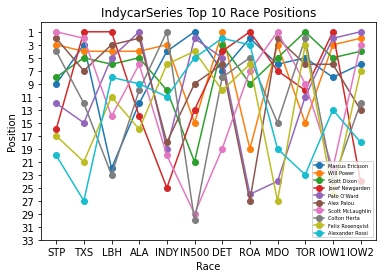

In [8]:
df.sort_values(['Points'], axis=0, ascending=False, inplace=True)
df = df.reset_index(drop=True)
plt.clf()
for index, row in df[races].iterrows():
    if index == 10:
        break
    plt.plot(row, 'o-')
plt.gca().invert_yaxis()
plt.title('IndycarSeries Top 10 Race Positions')
plt.xlabel("Race")
plt.ylabel("Position")
plt.legend(df['Driver'], loc='lower right', prop={'size': 5})
plt.yticks(range(1,34, 2))
# plt.savefig('Indycar Top 10.jpg', bbox_inches='tight', dpi=300)
plt.show()

# Seaborn top 10 plot
Following cell creates top 10 general classification plot using seaborn.

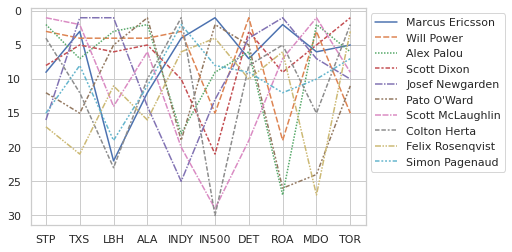

In [79]:
import seaborn as sns
df.sort_values(['Points'], axis=0, ascending=False, inplace=True)
df = df.reset_index(drop=True)
df_t = df[races].transpose()
df_t.columns = df['Driver'].tolist()
df_t = df_t.iloc[:, 0:10]
sns.set(style="whitegrid")
g = sns.lineplot(data=df_t, legend=df['Driver'].tolist())
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.gca().invert_yaxis()
plt.show()

# Styling and showing GC
Following cell styles and shows GC of Indycar Series. It shows top 25 by default. If you want to show different number of drivers, you'll need to change the value of how_many_rown variable in first line and execute cell again.

In [77]:
how_many_rows = 35
def where(data):
    # ['3 Teams', 'AJ Foyt', 'Andretti', 'Arrow McLaren', 'Chip Ganassi', 
    # 'Dale Coyne', 'Dragonspeed/Cusick', 'Dreyer & Reinbold', 'Ed Carpenter', 
    # 'Juncos Hollinger', 'Meyer Shank', 'Paretta', 'Penske', 'Rahal Letterman']
    cm = ['#000000','#A39B73', '#FFFEA3', '#F07F19', '#642701', '#5E5AA8', '#34AAE1', '#525763', '#C81B22', '#059C42', '#C90277', '#8dc8e8', '#292929', '#AD1722']
    label_color = ['white','black', 'black', 'white', 'white', 'white', 'white', 'white','white', 'white', 'white', 'white', 'white', 'white']
    teams = list(df['Team'].unique())
    teams.sort()
    res = []
    for x in data:
        for i, y in enumerate(teams):
            if x in y:
                res.append(f"background-color: {cm[i]}; color: {label_color[i]}")
                break
    while len(res) < len(data):
        res.append('')
    return res
def highlight_everyother(s):
    if s.name%2==1:
        return ['background-color: #212121; color: white; border-color: #212121; text-align: right'] * len(s)
    else:
        return ['background-color: #111111; color: white; border-color: #111111; text-align: right'] * len(s)
pd.set_option('colheader_justify', 'center')
df_st = df_res.head(how_many_rows).style.apply(highlight_everyother, axis=1)
df_st = df_st.apply(where, subset=['Team'])
df_st.hide_columns(subset=['Rookie'])
df_st.hide_index()
if not positions_on_specific_tracks:
    df_st.format({'Points':'{:.0f}', 'To 1st':'{:.0f}', 'PTR':'{:.0f}', 'PTO':'{:.0f}', 'PTSt':'{:.0f}', 'PPR':'{:.2f}', 'AVG Pos': '{:.1f}', 'PosDEV': '{:.1f}'})
else:
    df_st.format({'Points':'{:.0f}', 'To 1st':'{:.0f}', 'PPR':'{:.2f}', 'AVG Pos': '{:.1f}', 'PosDEV': '{:.1f}'})
df_st.set_properties(subset=['Team'], **{'text-align': 'center', 'font-weight':'bold'})
df_st.set_properties(subset=['Country'], **{'text-align': 'center'})
df_st.set_properties(subset=['Driver'], **{'font-weight':'bold'})
df_st.set_properties(subset=['Points'], **{'font-weight':'bold', 'color':'white'})
df_st.set_properties(subset=['Starts', 'Wins', 'Top 3', 'Top 5', 'Top 10'], **{'text-align': 'center'})
df_st.set_table_styles([{'selector': 'th.col_heading.col5', 'props': 'text-align: center'}])


Pos,Driver,Nr,Country,Team,Points,To 1st,PTR,PTO,PTSt,PPR,AVG Pos,PosDEV,Starts,Wins,Top 3,Top 5,Top 10
1,Marcus Ericsson,8,🇸🇪,Chip Ganassi,403,0,120,197,86,33.58,7.1,5.6,12,1,3,5,10
2,Will Power,12,🇦🇺,Penske,395,-8,114,144,137,32.92,6.3,6.2,12,1,6,9,9
3,Josef Newgarden,2,🇺🇲,Penske,369,-34,101,147,121,30.75,9.8,8.8,12,4,4,5,7
4,Scott Dixon,9,🇳🇿,Chip Ganassi,369,-34,102,125,142,30.75,6.8,5.1,12,1,2,7,11
5,Pato O'Ward,5,🇲🇽,Arrow McLaren,367,-36,76,193,98,30.58,10.2,9.1,12,2,4,6,6
6,Alex Palou,10,🇪🇸,Chip Ganassi,359,-44,98,127,134,29.92,8.4,7.6,12,0,4,4,9
7,Scott McLaughlin,3,🇳🇿,Penske,317,-86,118,96,103,26.42,11.1,9.5,12,2,4,4,7
8,Colton Herta,26,🇺🇲,Andretti,278,-125,119,52,107,23.17,12.2,9.3,12,1,2,4,6
9,Felix Rosenqvist,7,🇸🇪,Arrow McLaren,275,-128,77,110,88,22.92,12.8,8.4,12,0,1,2,6
10,Alexander Rossi,27,🇺🇲,Andretti,265,-138,89,94,82,22.08,13.2,8.2,12,0,2,3,5


<Figure size 432x288 with 0 Axes>

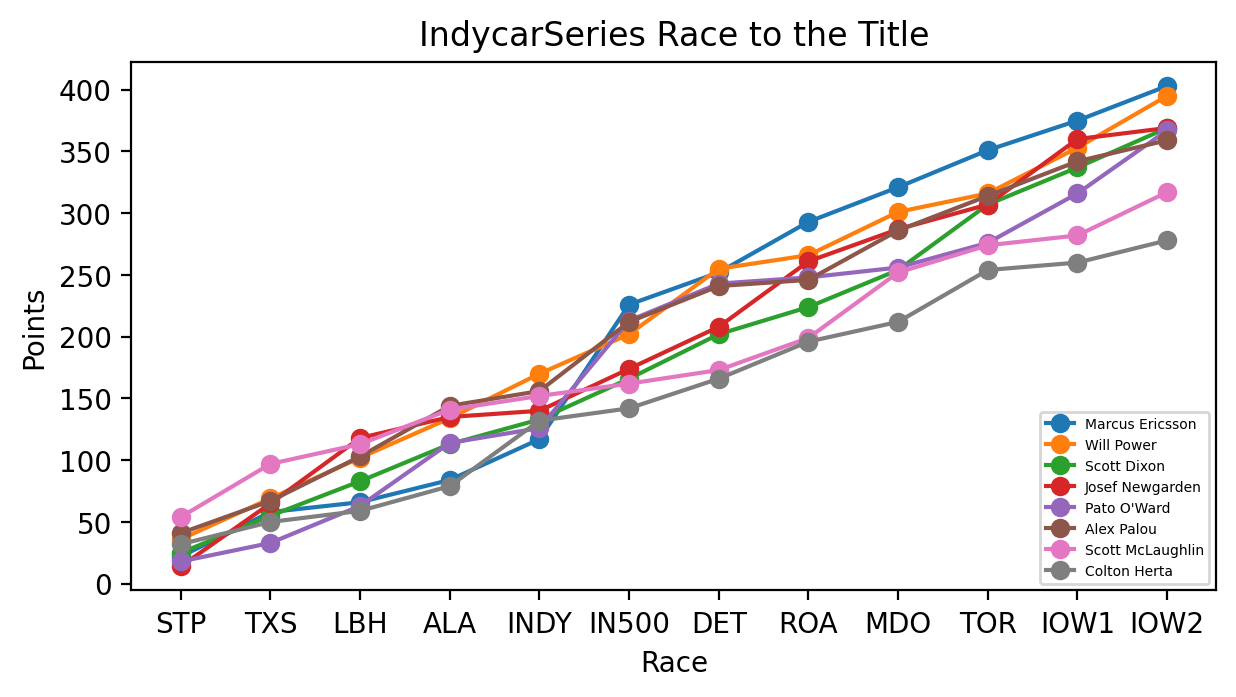

In [121]:
# df_points = df2.loc[:, 'STP':'R17']
# df_points = pd.concat((df2.loc[:,'Driver'], df2.loc[:, 'STP':'R17']))
# df_points.columns[0] = 'Driver'
how_many_races = 12
race_names = ['STP', 'TXS', 'LBH', 'ALA', 'INDY', 'IN500', 'DET', 'ROA',
              'MDO', 'TOR', 'IOW1', 'IOW2', 'IGP', 'NSH', 'GAT', 'POR', 'LAG'][:how_many_races]
points_array = np.zeros((df2.shape[0], how_many_races))
df2 = df2.fillna(0)
for i in range(points_array.shape[0]):
    for j in range(points_array.shape[1]):
        # races = columns[np.r_[4:9,10:22]]
        if j < 5:
            points_array[i,j] = df2.iloc[i, 4:4+j+1].to_numpy().sum() 
        # elif j == 6:
        #     points_array[i,j] = df2.iloc[i, 4:8].to_numpy().sum() #+ df2.iloc[i, 22:22+j+1].to_numpy().sum()
        elif j>=5:
            points_array[i,j] = df2.iloc[i, 4:4+j+2].to_numpy().sum() #+ df2.iloc[i, 22:22+j+1].to_numpy().sum()
        points_array[i,j] += df2.iloc[i, 22:22+j+1].to_numpy().sum()
max_points = int(points_array[0, -1])
plt.clf()
plt.figure(figsize=(7,3.5), dpi=200, facecolor=(1, 1, 1))
for index, row in enumerate(points_array):
    if index == 8:
        break
    plt.plot(row, 'o-')

# plt.gca().invert_yaxis()
plt.title('IndycarSeries Race to the Title')
plt.xlabel("Race")
plt.ylabel("Points")
plt.legend(df2['Driver'], loc='lower right', prop={'size': 5})
plt.yticks(range(0, max_points, 50))
plt.xticks(range(how_many_races), race_names)

# plt.savefig('Indycar Top 10.jpg', bbox_inches='tight', dpi=300)
# plt.show()
plt.savefig('Race to title.png')